<a href="https://colab.research.google.com/github/MafeGomez-11/Metodos1_MariaFernandaGomez_MarianaMoya/blob/main/Tarea6/Tarea_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

**Teorema de Bayes**

1.  Un  médico  ha  observado  que  el  40%  de  sus  pacientes  fuma.   De  este  40%  el  75%  son hombres.   Entre  los  pacientes  que  no  fuman,  el  60%  son  mujeres.   Si  se  selecciona  unpaciente al azar:
**a)** ¿Cuál es la probabilidad de que sea mujer? P(M) = 23/50.


In [ ]:
prior=np.array([0.4,0.6])

likelihood=np.array([[0.75,0.4],[0.25,0.6]])
total_mujer=np.sum(prior*likelihood[1])
print("Probabilidad de que el paciente sea mujer (P(M)) =", total_mujer)


Probabilidad de que el paciente sea mujer (P(M)) = 0.45999999999999996


**b)** ¿Cuál es la probabilidad de que sea hombre y fume? P(F ∩ H) = 3/10

In [ ]:
total_hombre = np.sum(prior * likelihood[0])
posterior_hombre = prior * likelihood[0] / total_hombre
print("Probabilidad de que el paciente sea hombre y fume (P(F ∩ H)) =", prior[0] * likelihood[0][0])

Probabilidad de que el paciente sea hombre y fume (P(F ∩ H)) = 0.30000000000000004


**c)**   Si el paciente es mujer, ¿cuál es la probabilidad de que fume? P(F/M) = 5/23.

In [ ]:
posterior_mujer = prior * likelihood[1] / total_mujer
print("Probabilidad de que el paciente fume dado que es mujer (P(F | M)) =", posterior_mujer[0])


Probabilidad de que el paciente fume dado que es mujer (P(F | M)) = 0.2173913043478261


2. Suponga que se quiere estimar el número medio de estudiantes que se aproximan a la secretaria de física siguiendo una distribución de Poisson. El problema podría tener información inicial que puede ser utilizada como una función a priori de probabilidad. Esto asigna probabilidades a los posivles valores del parámetro $\lambda$. Supongamos que el número medio a priori de estudiantes es: $1,2,3,4$ con las probabilidades $\Pi(\lambda)=[0.4, 0.3, 0.2, 0.1]$ según las secretarias $1,2,3,4$ (información subjetiva). El número de estudiantes observados durante cierto intervalo de tiempo es $x=4$.

**a)** Haga la estimación inicial del parámetro $\hat{\lambda}. (Ans: \hat{\lambda}=2.0)$

**b)** Calcule la función de verosimilitud de la observación para cada modelo $\mathbb{P}(x/\lambda_i)=\mathcal{L}(x/\lambda_i)$ donde $i=1,2,3,4$

**c)** Aplicando el teorema de Bayes, calcule la función de distribución a posteriori para cada modelo: $\mathbb{P}(\lambda_i/x)=\frac{\mathcal{L}(x/\lambda_i)\Pi(\lambda_i)}{\sum_{\forall j}^{}\mathcal{L}(x/\lambda_j)\Pi(\lambda_j)}$               $| i,j=1,2,3,4$

**d)** Verifique que la distribución posterior está normalizada

**e)** Indique el modelo que más probablemente explique los datos

**f)** Usando la información subjetiva de cada secretaria y la verosimilitud de la observación (i,e. la distribución a posteriori). Calcule el mejor parámetro $\hat{\lambda}.(Ans:\hat{\lambda}=2.77)$

In [ ]:
import math
Prior = np.array([0.4,0.3,0.2,0.1])
lambda_ = np.array([1,2,3,4])
#a) lambda inicial
hatp = np.sum(Prior*lambda_)
print(f"estimación inicial lambda hat={hatp}")

#b) Likelihood
Poisson = lambda l,x: l**x*np.exp(-l)/math.factorial(x)
Likelihood = Poisson(lambda_,4)
print(f"funcion likelihood:{Likelihood}")

#c) distribucion a posteriori
Probx = np.sum(Prior*Likelihood)
Posterior = (Likelihood*Prior)/Probx
print(f"distribucion a posteriori:{Posterior}")

#d) normalización
normal=np.sum(Posterior)
print("¿Está normalizada?", np.isclose(normal, 1.0),",", normal)

#e)modelo mas probable
probable=lambda_[np.argmax(Posterior)]
print(f"El modelo más probable es:{probable}")

#f)mejor parámetro
parametro=np.sum(Posterior*lambda_)
print(f"El mejor parámetro (lambda hat) es:{parametro}")

estimación inicial lambda hat=2.0
funcion likelihood:[0.01532831 0.09022352 0.16803136 0.19536681]
distribucion a posteriori:[0.07101262 0.31348898 0.38922576 0.22627264]
¿Está normalizada? True , 1.0
El modelo más probable es:3
El mejor parámetro (lambda hat) es:2.7707584253176796


3.  En el problema anterior, imagine que en el primer intervalo de tiempo el número observado de estudiantes es $x_1= 4$, en el siguiente intervalo de tiempo el n ́umero de estudiantes es $x_2= 5$.  Realice todos los pasos anteriores del a) al f) teniendo en cuenta el likelihoodconjunto.  (Ans: $λ= 3.27$)

In [ ]:
from scipy.special import factorial

lamda = np.array([1., 2., 3., 4], dtype=np.float64)
prior = np.array([0.4, 0.3, 0.2, 0.1])
x1=4
x2=5

def poisson(l, x):
    return (l**x / factorial(x)) * np.exp(-l)

likelihood = np.array([poisson(l, x1) * poisson(l, x2) for l in lamda])
posterior =  likelihood*prior / np.sum(prior * likelihood)
print("Distribución posterior:", posterior)
print("¿Está normalizada?", np.isclose(np.sum(posterior), 1.0))


Distribución posterior: [0.00252736 0.1313438  0.45556534 0.41056351]
¿Está normalizada? True


In [ ]:
#verificamos que esté normalizado:
total = np.sum(prior * likelihood)
posterior = (prior * likelihood) / total
print("Suma de la distribución a posteriori (debe ser aproximadamente 1):", np.sum(posterior))


Suma de la distribución a posteriori (debe ser aproximadamente 1): 1.0


In [ ]:
mejor_lamda = lamda[np.argmax(posterior)]
print("Mejor lambda estimado:", mejor_lamda)

Mejor lambda estimado: 3.0


In [ ]:
lamda_estimado=np.sum(posterior*lamda)
print("Mejor lambda estimado, dado x1 y x2, es:", lamda_estimado)

Mejor lambda estimado, dado x1 y x2, es: 3.274164986959538


4. Un haz de partículas compuesto por electrones, protones y partículas $\alpha$, atraviesa un detector de partículas, que tiene una eficiencia de detección de 90%, 60% y 20% respectivamente. El flujo de electrones es el doble que el de protones y partículas $\alpha$.

**a)** Escriba la densidad de probabilidad a priori $\Pi(D/p)$, donde $p$= electrón, protón, $\alpha$.

**b)** Si se elije una partícula al azar, ¿cuál es la probabilidad de que sea detectada? $\mathbb{P}(D)=0.65$

**c)** Dibuje la función de probabilidad posterior usando ```plt.stem(Posterior)```

**d)** Si para una partícula dada el detector da señal, ¿cuál es la probabilidad de que sea cada una de las partículas. $\mathbb{P}(e/D)=0.6923,\ \mathbb{P}(p/D)=0.2307,\ \mathbb{P}(\alpha/D)=0.0076$

 P(D): 0.6500

Probabilidad posterior:
  P(e/D): 0.6923
  P(p/D): 0.2308
  P(α/D): 0.0769


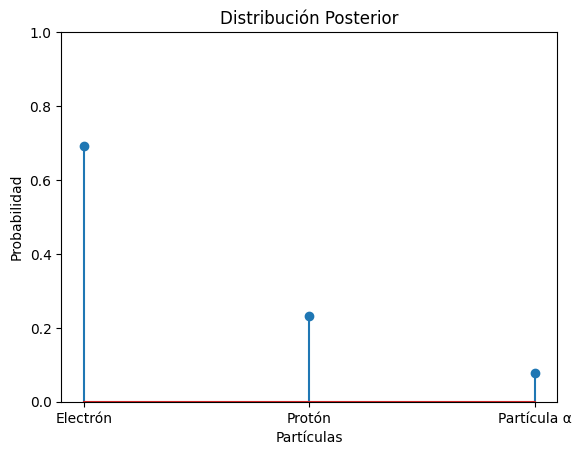

In [201]:
import matplotlib.pyplot as plt

#a) Densidad de probabilidad a priori
Prior = np.array([0.5,0.25,0.25])
Likelihood = np.array([0.9,0.6,0.2])
#b) Probabilidad de detección P(D)
Total = np.sum(Prior*Likelihood)
Posterior = Prior*Likelihood/Total

print(f" P(D): {Total:.4f}")
print("\nProbabilidad posterior:")
for i, particle in enumerate(['e', 'p', 'α']):
    print(f"  P({particle}/D): {Posterior[i]:.4f}")

#c) grafica
plt.stem(Posterior)
plt.xticks(range(len(Posterior)), ['Electrón', 'Protón', 'Partícula α'])
plt.title("Distribución Posterior")
plt.ylabel("Probabilidad")
plt.xlabel("Partículas")
plt.ylim(0, 1)
plt.show()



---



**Técnicas de conteo:**

**1.** Carlos, Manuel, Sandra correrán los 100 metros planos. ¿De cuántas formas puede quedar el podrio de primer y segundo lugar? Solo competirán ellos tres. R:6

In [ ]:
from scipy.special import factorial
corredores =3
num_puestos=2
combinaciones = factorial(corredores) // (factorial(corredores-num_puestos))
print("Número de combinaciones posibles para primer y segundo lugar:", combinaciones)

Número de combinaciones posibles para primer y segundo lugar: 6.0


**2.** ¿De cuántas formas se puede preparar una ensalada de frutas con solo 2 ingredientes, si se cuenta con plátano, manzana y uva?  R:3

In [ ]:
ingredientes = 3
num_ingredientes_para_elegir=2
combinaciones= factorial(ingredientes)/(factorial(num_ingredientes_para_elegir)*factorial(ingredientes-num_ingredientes_para_elegir))
print("Número de combinaciones posibles:", combinaciones)

Número de combinaciones posibles: 3.0


**3.** ¿De cuántas formas pueden hacer cola 5 amigos para entrar al cine?  R:120

In [ ]:
amigos=5
combinaciones = factorial(amigos)

print("Número de combinaciones posibles para hacer cola para entrar a cine:", combinaciones)  # Output: 120

Número de combinaciones posibles para hacer cola para entrar a cine: 120.0


**4.** ¿De  cuántas  formas  puede  un  juez  otorgar  el  primero,  segundo  y  tercer  premio  en  unconcurso que tiene 8 participantes R:336

In [ ]:
participantes = 8
numero_premios = 3

permutaciones = factorial(participantes) // factorial(participantes - numero_premios)
print("Número total de maneras de otorgar los premios:", permutaciones)

Número total de maneras de otorgar los premios: 336.0


**5.** El capitán de un barco solicita 2 marineros para realizar un trabajo, sin embargo, se presentan 10. ¿De cuántas formas podrá seleccionar a los 2 marineros?  R:45

In [ ]:
posibles_marineros = 2
marineros = 10

combinaciones = factorial(marineros) / (factorial(posibles_marineros)*factorial(marineros - posibles_marineros))
print("Número de formas de seleccionar a 2 marineros:", combinaciones)

Número de formas de seleccionar a 2 marineros: 45.0


**6.**  Eduardo  tiene  7  Libros,  ¿De  cuántas  maneras  podrá  acomodar  cinco  de  ellos  de  un estante?  R:2520.

In [ ]:
libros = 7
libros_por_estante = 5

permutaciones = factorial(libros) // factorial(libros - libros_por_estante)
print("Número total de maneras de acomodar los libros:", permutaciones)

Número total de maneras de acomodar los libros: 2520.0


**7.** En un salón de 10 alumnos, ¿de cuántas maneras se puede formar un comité formado por 2 de ellos? R:45

In [ ]:
seleccionados = 2
estudiantes = 10

combinaciones = factorial(estudiantes) / (factorial(seleccionados)*factorial(estudiantes - seleccionados))
print("Número de maneras con las que se puede formar un comité formado por 2:", combinaciones)

Número de maneras con las que se puede formar un comité formado por 2: 45.0


**8.** ¿Cuántas palabras diferentes se puede formar con las letras de la palabra REMEMBER? R:1680

In [ ]:
numero_letras=8
repeticiones=[2,3,2]

permutacion= factorial(numero_letras)// np.prod([factorial(r) for r in repeticiones])
print("Número de palabras diferentes:", permutacion)

Número de palabras diferentes: 1680.0


**9.** Un club de basketball tiene 12 jugadoras, una de ellas es la capitana María. ¿Cuántos equipos diferenctes de 6 jugadoras se pueden formar, sabiendo que en todos ellos siempre debe estar la capitana María. R:462

In [ ]:
jugadoras = 12
numero_en_equipo = 6
capitana=1

combinaciones = factorial(jugadoras-capitana) / (factorial(numero_en_equipo)*factorial(jugadoras-capitana-numero_en_equipo))
print("Número de equipos de 6 con la capitana en ellos:", combinaciones)

Número de equipos de 6 con la capitana en ellos: 462.0


**10.**   Con 4 frutas diferentes, ¿cuántos jugos surtidos se pueden preparar?.  Un jugo surtido se debe preparar con al menos 2 frutas.  R:11

In [ ]:
def combinaciones(n, k):
    return factorial(n) // (factorial(k) * factorial(n - k))

con_2_frutas = combinaciones(4, 2)
con_3_frutas = combinaciones(4, 3)
con_4_frutas = combinaciones(4, 4)
print("Combinaciones con al menos 2 frutas:", con_2_frutas)
print("Combinaciones con al menos 3 frutas:", con_3_frutas)
print("Combinaciones con al menos 4 frutas:", con_4_frutas)

total_jugos = con_2_frutas + con_3_frutas + con_4_frutas
print("Total de jugos surtidos:", total_jugos)

Combinaciones con al menos 2 frutas: 6.0
Combinaciones con al menos 3 frutas: 4.0
Combinaciones con al menos 4 frutas: 1.0
Total de jugos surtidos: 11.0


**11.** En un curso de 10 estudiantes se desea escoger presidente, vicepresidente y secretario. ¿De cuántas formas se pueden seleccionar los 3 estudiantes? R:720

In [ ]:
estudiantes=10
seleccionados=3
permutaciones=factorial(estudiantes)//factorial(estudiantes-seleccionados)
print("Combinaciones posibles para presidente, vicepresidente y secretario:", permutaciones)

Combinaciones posibles para presidente, vicepresidente y secretario: 720.0


**12.** En un campeonato compiten 8 equipos ¿de cuántas maneras diferentes se podrían ganarlos premios de campeón y sub-campeón?  R:56

In [ ]:
participantes = 8
numero_premios = 2

permutaciones = factorial(participantes) // factorial(participantes - numero_premios)
print("Número total de maneras de otorgar los premios:", permutaciones)

Número total de maneras de otorgar los premios: 56.0


**13.** ¿Cuántos números de 3 cifras distintas se pueden formar con los dígitos del 1 al 7? R:210

In [ ]:
digitos= 7
cifras=3
permutaciones=factorial(digitos)//factorial(digitos-cifras)
print("Cantidad de números de 3 cifras distintas formadas con dígitos del 1 al 7:", permutaciones)

Cantidad de números de 3 cifras distintas formadas con dígitos del 1 al 7: 210.0


**14.** ¿Cuántos números de 3 cifras se pueden formar con los dígitos del 1 al 7?  R:343

In [ ]:
cantidad_numeros=7
digitos_por_numero=3

total_numeros=cantidad_numeros**digitos_por_numero
print("Número de números diferentes:", total_numeros)


Número de números diferentes: 343


**15.** De un grupo de 10 estudiantes se quiere seleccionar un comité al azar de 3 estudiantes. ¿De cuántas maneras diferentes se puede seleccionar el comité?  R:120

In [ ]:
def comite_estudiantes(estudiantes, comite):
    combinaciones = factorial(estudiantes) // (factorial(comite) * factorial(estudiantes - comite))
    return combinaciones

estudiantes=10
comite=3
total_comites=comite_estudiantes(estudiantes, comite)
print("Número de comites diferentes:", total_comites)

Número de comites diferentes: 120.0


**16.** ¿Cuántas placas diferentes se pueden hacer con 3 letras y 3 dígitos?  R:17576000




In [ ]:
def placas_diferentes(letras, digitos):
    total_placas = letras**3*digitos**3
    return total_placas
letras=26
digitos=10
total_placas=placas_diferentes(letras, digitos)
print("Número de placas diferentes:", total_placas)

Número de placas diferentes: 17576000


**17.** n Personar van a jugar cartas alrededor de una mesa, ¿de cuántas maneras diferentes sepueden sentar?  R:$(n−1)!$

In [ ]:
from scipy.special import factorial
import math

def maneras_de_sentar(numero_personas):
  if numero_personas < 1:
    return 0
  elif numero_personas == 1:
    return 1
  else:
    return math.factorial(numero_personas - 1)

numero_personas = int(input("Introduce el número de personas: "))


maneras = maneras_de_sentar(numero_personas)
print(f"Número de maneras de sentar a {numero_personas} personas alrededor de una mesa circular {maneras}")

Introduce el número de personas: 5
Número de maneras de sentar a 5 personas alrededor de una mesa circular 24


Para solucionar este punto tuvimos en cuenta que para sentar n personas alrededor de una mesa circular, fijamos a una persona y al resto los vamos a permutar. En este caso aplicamos la fórmula a $n-1$ personas y ordenamos las probabilidades por los elementos del factorial $(n-1)!$.  

**18.** En una heladería ofrecen 7 diferentes sabores, ¿cuántas combinaciones de helado de 3 sabores se pueden hacer? R:84

In [ ]:
sabores = 7
sabores_por_helado = 3

combinaciones = factorial(sabores+sabores_por_helado-1) // (factorial(sabores_por_helado) * factorial(sabores - 1))
print("Número de combinaciones de helados:", combinaciones)

Número de combinaciones de helados: 84.0


**19.** En un almacén venden 6 diferentes sabores de gaseosas, ¿de cuántas formas se pueden seleccionar 3 gaseosas?.¿De cuántas formas diferentes se pueden seleccionar 3 gaseosas? R:56, R:20

In [ ]:
sabores_gaseosas=6
seleccion=3
combinaciones_repetidas=factorial(sabores_gaseosas+seleccion-1) // (factorial(seleccion) * factorial(sabores_gaseosas - 1))
combinaciones_sin_repeticion = factorial(sabores_gaseosas) // (factorial(seleccion) * factorial(sabores_gaseosas - seleccion))
print("Formas de seleccionar 3 gaseosas:", combinaciones_repetidas)
print("Formas diferentes de seleccionar 3 gaseosas", combinaciones_sin_repeticion)

Formas de seleccionar 3 gaseosas: 56.0
Formas diferentes de seleccionar 3 gaseosas 20.0


**20.** Demostrar la fórmula de combinaciones con  repetición

$C_{r}^{n}=$

In [202]:
import math
import itertools

def combinaciones_con_repeticion(n, r):
    return math.comb(n + r - 1, r)

def generar_combinaciones_con_repeticion(n, r):
    elementos = list(range(n))
    combinaciones = list(itertools.combinations_with_replacement(elementos, r))
    return len(combinaciones), combinaciones

n=5
r=3

resultado_formula = combinaciones_con_repeticion(n, r)
print(f"Combinaciones con repetición (fórmula): {resultado_formula}")

numero_combinaciones, combinaciones = generar_combinaciones_con_repeticion(n, r)
print(f"Combinaciones con repetición (generadas): {numero_combinaciones}")
print(f"Combinaciones generadas: {combinaciones}")

assert resultado_formula == numero_combinaciones, "¡Los resultados no coinciden!"


Combinaciones con repetición (fórmula): 35
Combinaciones con repetición (generadas): 35
Combinaciones generadas: [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 2, 2), (0, 2, 3), (0, 2, 4), (0, 3, 3), (0, 3, 4), (0, 4, 4), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 2, 2), (1, 2, 3), (1, 2, 4), (1, 3, 3), (1, 3, 4), (1, 4, 4), (2, 2, 2), (2, 2, 3), (2, 2, 4), (2, 3, 3), (2, 3, 4), (2, 4, 4), (3, 3, 3), (3, 3, 4), (3, 4, 4), (4, 4, 4)]


**Generales de probabilidad**

**1.**  Se lanza un dado equi-probable dos veces.  Dados los siguientes eventos:

**a)** La suma de los resultados es menor o igual a 3.

**b)** El resultado del primer lanzamiento es impar.CalcularP(A) = 1/12,P(B) = 1/2,P(A∪B) = 19/36 yP(Ac) = 11/12

In [ ]:
espacio_muestral = 36
casos_favorables_A = 0
pares_favorables=[]
for i in range(1, 7):
    for j in range(1, 7):
        if i + j <= 3:
            casos_favorables_A += 1
            pares_favorables.append((i, j))
P_A = casos_favorables_A / espacio_muestral

casos_favorables_B = 18
P_B = casos_favorables_B / espacio_muestral

casos_favorables_A_interseccion_B = 1
P_A_interseccion_B = casos_favorables_A_interseccion_B / espacio_muestral

P_A_union_B = P_A + P_B - P_A_interseccion_B


P_Ac = 1 - P_A
print("Pares donde la suma es menor o igual a 3:", pares_favorables)
print("Pares donde la suma es menor o igual a 3:", casos_favorables_A)
print("P(A) =", P_A)
print("P(B) =", P_B)
print("P(A ∪ B) =", P_A_union_B)
print("P(A^c) =", P_Ac)


Pares donde la suma es menor o igual a 3: [(1, 1), (1, 2), (2, 1)]
Pares donde la suma es menor o igual a 3: 3
P(A) = 0.08333333333333333
P(B) = 0.5
P(A ∪ B) = 0.5555555555555556
P(A^c) = 0.9166666666666666


**2**   Se  prueban  5  celulares  de  un  lote  de  50  equipos  donde  existen  2  defectuosos.   Si  elmuestreo  se  realiza  sin  reposición.   Hallar  la  probabilidad  que  al  menos  un  celular  sea defectuoso. $P{}(A)  =  47/245$. Piense  en $A^c$ y  en  el  principio  multiplicativo  o  en  una estrategia combinatoria

In [ ]:
def proba_defectuoso(total_celulares, celulares_defectuosos, muestra):
    celulares_no_defectuosos = total_celulares - celulares_defectuosos
    P_Ac= 1
    for i in range(muestra):
        P_Ac *= (celulares_no_defectuosos - i) / (total_celulares - i)
    P_A=1-P_Ac
    return P_A

total_celulares = 50
defectuosos = 2
muestra = 5
probabilidad = proba_defectuoso(total_celulares, defectuosos, muestra)
probabilidad


0.19183673469387763

**3.**  En una cierta ciudad el 60% de los propietarios están suscritos al diario y el 80% al cable. Adicionalmente, el 50% est ́an suscritos a ambos.  Si un propietario es elegido al azar:

**a)**  ¿Cuál es la probabilidad que esté suscrito a uno de los dos servicios? $P(A∪B) = 0.9$.

**b)**  ¿Cuál  es  la  probabilidad  que  esté suscrito  al  diario  o  al  cable,  pero  no  a  ambos servicios?
$P((A∩B^c)∪(B∩A^c)) = 0.4$.


In [ ]:
#A: La persona tiene suscripción con el diario
#B: La persona tiene suscripción al cable
#P(A): La probabilidad de que la persona esté suscrita al diario = 0.6
#P(B): La probabilidad de que la persena esté suscrita cable = 0.8
#P(AyB): La probabilidad de que tengan ambos

P_A=0.6
P_B=0.8
P_A_y_B=0.5 #ambos

#a). probabilidad de tener los 2 servicios:

P_A_union_B=P_A+P_B-P_A_y_B

print("Probabilidad de tener los 2 servicios:", P_A_union_B)

Probabilidad de tener los 2 servicios: 0.8999999999999999


In [ ]:
#b). Probabilidad de que esté suscrito al diario o al cable o al revés (no a ambos):

P_A_interseccion_Bc = P_A - P_A_y_B
P_B_interseccion_Ac = P_B - P_A_y_B

p_unico_servicio = P_A_interseccion_Bc + P_B_interseccion_Ac

print("Probabilidad de que esté suscrito al diario o al cable o al revés (no a ambos):", p_unico_servicio)

Probabilidad de que esté suscrito al diario o al cable o al revés (no a ambos): 0.4


**4.** Calcular la probabilidad que $n$ personas ($n\leq365$) tengan fechas diferentes de cumpleaños, i.e, escribir la formula general de cálculo. Grafique la probabilidad $\mathbb{P}(n\leq80)$ como funcion de $n$. Los números son demasiado grandes, pero python puede manejar dichas cantidades.

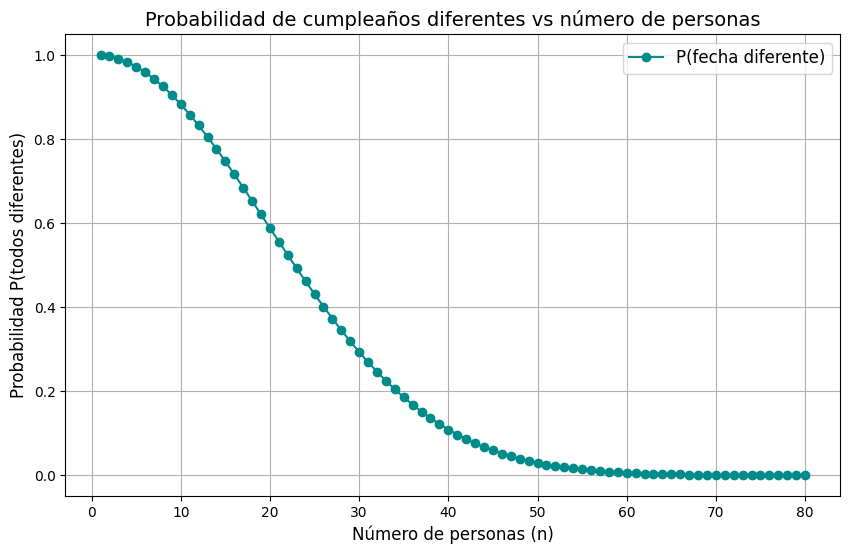

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def probabilidad_cumpleaños_diferentes(n):
    prob = 1.0
    for i in range(n):
        prob *= (365 - i) / 365
    return prob

n_values = np.arange(1, 81)
prob_values = [probabilidad_cumpleaños_diferentes(n) for n in n_values]


plt.figure(figsize=(10, 6))
plt.plot(n_values, prob_values, marker='o', color='darkcyan', label='P(fecha diferente)')
plt.title("Probabilidad de cumpleaños diferentes vs número de personas", fontsize=14)
plt.xlabel("Número de personas (n)", fontsize=12)
plt.ylabel("Probabilidad P(todos diferentes)", fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()


**5.** Se lanzan dos dados equi-probables y se observan los siguientes eventos:

a) La suma es 8: $\mathbb{P}(A)=5/36$

b) El segundo dado es impar:$\mathbb{P}(B)=1/2$

Calcule $\mathbb{P}(A\cap B) \ y \ \mathbb{P}(A)\cdot\mathbb{P}(B)$ ¿Qué podría concluir?

In [ ]:
import numpy as np

simulaciones = 100000

dado1 = np.random.randint(1, 7, simulaciones)
dado2 = np.random.randint(1, 7, simulaciones)

A = (dado1 + dado2 == 8)

B = (dado2 % 2 != 0)

A_y_B = A & B

P_A = np.sum(A) / simulaciones
P_B = np.sum(B) / simulaciones
P_A_y_B = np.sum(A_y_B) / simulaciones
P_A_P_B = P_A * P_B

print("P(A) =", P_A)
print("P(B) =", P_B)
print("P(A and B) =", P_A_y_B)
print("P(A) * P(B) =", P_A_P_B)

if P_A_y_B == P_A_P_B:
    print("Los eventos A y B son independientes.")
else:
    print("Los eventos A y B NO son independientes.")

P(A) = 0.13802
P(B) = 0.50183
P(A and B) = 0.05509
P(A) * P(B) = 0.0692625766
Los eventos A y B NO son independientes.


Con esto, podemos concluir que los eventos A y B no son eventos independientes.

**6.** Se lanza simultáneamente 3 dados de 6 caras. ¿Cuál es la probabilidad de obtener 1 par? $\mathbb{P}(A)=5/12$. Realice el calculo de esta probabilidad usando un experimento virtual con $N=10^5$ eventos.

In [ ]:
import numpy as np


N = 10**5
caras = 6


resultados = np.random.randint(1, caras + 1, (N, 3))

def es_un_par(dados):
    conteo = np.unique(dados, return_counts=True)[1]  #ayuda IA
    return 2 in conteo and 1 in conteo

casos_favorables = sum(es_un_par(dados) for dados in resultados)

P_A = casos_favorables / N

print(f"Probabilidad de obtener un par: {P_A}")


Probabilidad de obtener un par: 0.41358


**7)**   Se lanza simultáneamente 5 dados de 6 caras.  ¿Cuál es la probabilidad de obtener?

a)  1 par:P(A) = 25/54.

b)  2 pares distintos:P(B) = 25/108.

c)  4 de la misma cara:P(C) = 25/1296.

Realice  el  cálculo  de  la  probabilidad  de  los  numerales  a)  y  b)  usando  un  experimento virtual con N= 10e5 eventos.

In [ ]:
from scipy.special import factorial, comb

totales=6**5
casos_favorables_A=6* comb(5,2)*5*4*3
probabilidad_par = casos_favorables_A / totales
print("Probabilidad de obtener 1 par:", probabilidad_par)

Probabilidad de obtener 1 par: 0.46296296296296297


In [ ]:
totales = 6**5
casos_favorables = comb(6, 2) * comb(5, 2) * comb(3, 2) * 4
probabilidad_dos_pares = casos_favorables / totales
print("Probabilidad de obtener 2 pares distintos:", probabilidad_dos_pares)

Probabilidad de obtener 2 pares distintos: 0.23148148148148148


In [ ]:
totales = 6**5
casos_favorables_C = 6 * comb(5, 1) * 5
probabilidad_4_misma = casos_favorables_C / totales
print("Probabilidad de obtener 4 de la misma cara:", probabilidad_4_misma)

Probabilidad de obtener 4 de la misma cara: 0.019290123456790122


In [ ]:
import numpy as np
N = int(10e5)

dados = np.random.randint(1, 7, (N, 5))

def cuenta_un_par(resultados):
    _, conteos = np.unique(resultados, return_counts=True)
    return np.sum(conteos == 2) == 1 and np.sum(conteos == 1) == 3

def dos_pares_distintos(resultados):
    _, conteos = np.unique(resultados, return_counts=True)
    return np.sum(conteos == 2) == 2

un_par = np.sum([cuenta_un_par(tirada) for tirada in dados])
dos_pares = np.sum([dos_pares_distintos(tirada) for tirada in dados])

P_A = un_par / N
P_B = dos_pares / N

print("Probabilidad de obtener 1 par (P(A)):", P_A)
print("Probabilidad de obtener 2 pares distintos (P(B)):", P_B)

Probabilidad de obtener 1 par (P(A)): 0.462857
Probabilidad de obtener 2 pares distintos (P(B)): 0.231717


**12)**  (Microcanonical ensemble) Hay un sistema constituido por Npartículas,  cada una puede estar en dos niveles de energía distintos (no degenerados) de valor $ε_0$ y $ε_1$ $(ε_1> ε_0)$. Si llamamos $n_0$ al número de partículas en el estado $ε_0$ y a $n_1$ al número de partículas en el estado $ε_1$.  Se tienen las siguientes restricciones para la energía total y el número total de partículas:

$E=n_0ε_0+n_1ε_1$

$N=n_0+n_1$

a)  Muestre que el numero de configuraciones posibles (micro-estados) está dado por:
$Ω(N, n_0)=\frac{N!}{n_0!n_1!}$

In [ ]:
from math import factorial

def microestados(N, n0,n1):
    return factorial(N) // (factorial(n0) * factorial(n1))

N = 1000
n0 = 500
n1 = N - n0
print(f"Número de configuraciones posibles: Ω(N, n0) = {microestados(N, n0,n1)}")


Número de configuraciones posibles: Ω(N, n0) = 270288240945436569515614693625975275496152008446548287007392875106625428705522193898612483924502370165362606085021546104802209750050679917549894219699518475423665484263751733356162464079737887344364574161119497604571044985756287880514600994219426752366915856603136862602484428109296905863799821216320


In [ ]:
from math import log

k_B = 1.38e-23  # J/K

#punto b:

# Entropía exacta usando Stirling
def entropy_exact(N, n0, n1):
    if n0 > 0 and n1 > 0:  # Evitar log(0)
        return k_B * (N * log(N) - n0 * log(n0) - n1 * log(n1))
    else:
        return 0

# Cálculo
entropia_exacta = entropy_exact(N, n0, n1)
print(f"La entropía exacta es: {entropia_exacta} J/K")


La entropía exacta es: 9.56543109172724e-21 J/K


In [ ]:
#Punto c:

# Entropía como función de x
def entropy_x(N, x):
    if x > 0 and x < 1:
        return -k_B * N * (x * log(x) + (1 - x) * log(1 - x))
    else:
        return 0

# Cálculo para x
x = (N-n0)/ N
entropia_x = entropy_x(N, x)
print(f"La entropía para x = {x} es: {entropia_x} J/K")


La entropía para x = 0.5 es: 9.565431091727245e-21 J/K


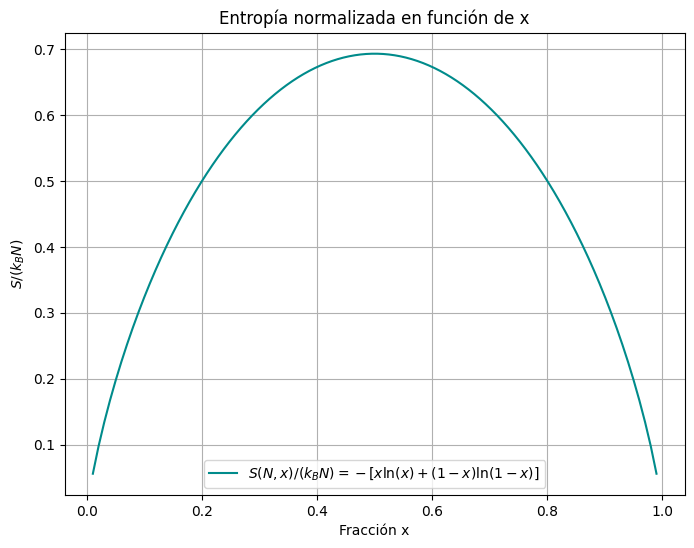

In [ ]:
#Punto d: dibujo de la entropía
import numpy as np
import matplotlib.pyplot as plt

x_vals = np.linspace(0.01, 0.99, 100)
S_vals = [entropy_x(N, x) / (k_B * N) for x in x_vals]

plt.figure(figsize=(8, 6))
plt.plot(x_vals, S_vals, label=r"$S(N, x) / (k_B N)= -[x\ln(x) + (1-x)\ln(1-x)]$", color='darkcyan')
plt.xlabel("Fracción x")
plt.ylabel(r"$S / (k_B N)$")
plt.title("Entropía normalizada en función de x")
plt.grid(True)
plt.legend()
plt.show()


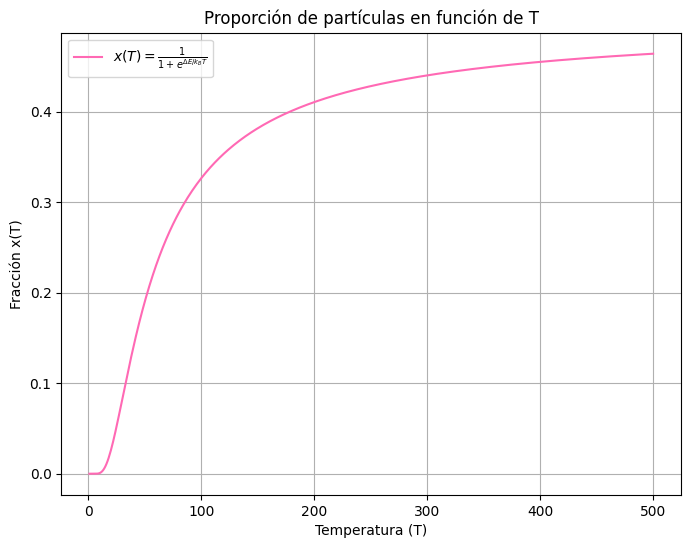

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

Delta_E = 1e-21

#Punto e:
# Proporción de partículas en función de la temperatura
def x_T(T, Delta_E, k_B, threshold=1e-10, max_exp_arg=700):
    argumento =Delta_E / (k_B * T)
    clipped_factor = np.clip(argumento, -max_exp_arg, max_exp_arg)
    factor_boltzmann = np.exp(clipped_factor)

    proportion = 1 / (1 + factor_boltzmann)
    #return np.maximum(proportion, threshold)
    proporción_s=max(proportion, threshold)
    return proporción_s
# Temperaturas para graficar
T_vals = np.linspace(1, 500, 500)  # Kelvin
x_T_vals = [x_T(T, Delta_E, k_B) for T in T_vals]

# Gráfica
plt.figure(figsize=(8, 6))
plt.plot(T_vals, x_T_vals, label=r"$x(T) = \frac{1}{1 + e^{\Delta E / k_B T}}$",color="hotpink")
plt.xlabel("Temperatura (T)")
plt.ylabel("Fracción x(T)")
plt.title("Proporción de partículas en función de T")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
#Punto f
T_low=1e-10
T_high=1e10
x_low_T= x_T(T_low, Delta_E, k_B)
x_high_T= x_T(T_high, Delta_E, k_B)

print(f"Fracción de partículas en T_low: {x_low_T}")
print(f"Fracción de partículas en T_high: {x_high_T}")
# Cálculo de la entropía a altas temperaturas
S_high_T = k_B * N * np.log(2)
print(f"La entropía a altas temperaturas es: {S_high_T} J/K")


Fracción de partículas en T_low: 1e-10
Fracción de partículas en T_high: 0.4999999981884058
La entropía a altas temperaturas es: 9.565431091727245e-21 J/K


In [ ]:
#Punto g
# Cambio de entropía en una expansión isotérmica
V1 = 1.0  # Volumen inicial
V2 = 2.0 * V1  # Volumen final

delta_S = N * k_B * log(V2 / V1)
print(f"El cambio de entropía en la expansión isotérmica es: {delta_S} J/K")


El cambio de entropía en la expansión isotérmica es: 9.565431091727245e-21 J/K


A nivel conceptual, tanto el cambio de entropía en la expansión isotérmica de un gas ideal como la entropía de un sistema de partículas en dos niveles de energía están relacionados y son coherentes porque ambos reflejan el aumento de la entropía debido a un incremento en el número de microestados accesibles, lo cual implica una mayor dispersión de las partículas. En la expansión isotérmica, el cambio de entropía sigue la ley de la termodinámica relacionada con la expansión de volumen, lo que aumenta la dispersión de las partículas debido a que el sistema ocupa un mayor volumen, permitiendo más configuraciones posibles. En contraste, en el sistema de dos niveles de energía, el aumento de entropía se debe a la distribución de las partículas entre los dos niveles energéticos disponibles, lo que también genera una mayor dispersión. En general, aunque ambos procesos muestran un aumento de la entropía, la magnitud del cambio es mayor en la expansión isotérmica del gas ideal, debido a la mayor cantidad de partículas y el cambio significativo en el volumen, en comparación con la distribución más limitada de partículas entre dos niveles de energía en el segundo caso.

**Hidden Markov**

Un casino tiene dos tipos monedas una justa (J) y una sesgada (B), las probabilidades de obtener cara y sello son:
$P_J = [0.5,0.5]$ y $P_B = [0.9,0.1]$ respectivamente. El tipo de moneda se escoge siguiendo esta ley de transición:


$T = \begin{pmatrix}
& J & B \\
J & 0.8 & 0.2 \\
B & 0.2 & 0.8
\end{pmatrix}$


Por otro lado, la matriz de emisión está dada por:
$E = \begin{pmatrix}
& J & B \\
C & 0.5 & 0.9 \\
S & 0.5 & 0.1
\end{pmatrix}$


Se realiza un experimento de 8 lanzamientos y se obtiene la siguiente secuencia:
$\Omega_O = [S,C,C,C,S,C,S,C]$


Ejercicios:

a) Use la siguiente distribución de probabilidad a-priori $\pi = [0.2,0.8]$ para la moneda justa y sesgada.


b) Encuentre la secuencia oculta más probable del tipo de moneda que se eligió en cada lanzamiento y su respectiva probabilidad $P_i$.


c) Calcule las probabilidades de cada estado observable (o) como la suma de las probabilidades de todos los estados ocultos, $P_o = \sum P_i$.


d) Verifique que la suma de todos los estados observables es 1.
$\sum P_o = 1$


e) ¿Depende el resultado de la probabilidad a-priori?

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]
 ...
 [1 1 1 ... 1 0 1]
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 1]]
[[0 0 0 0 0 0 0 0]] [0.00032768]


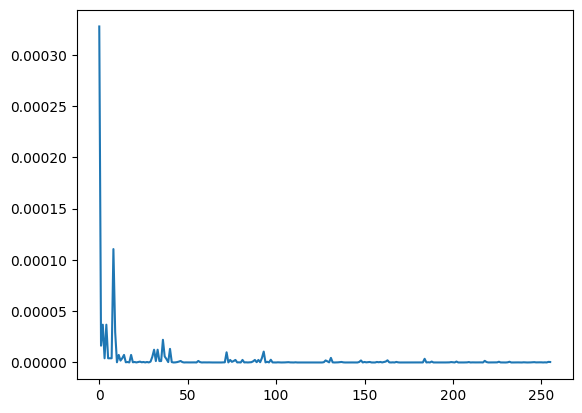

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement
States= np.array([0,1]) #donde 0 es J, 1 es B
prior= np.array([0.2, 0.8])

T=np.array([[0.8, 0.2],[0.2,0.8]])
E=np.array([[0.5, 0.9],[0.5, 0.1]])

Obs=  np.array([0,1,1,1,0,1,0,1])

DictH = {0: 'Justa', 1: 'Sesgada'}
DictO = {0: 'Sello', 1: 'Cara'}


def GetStates(State,N):
    CStates = list(combinations_with_replacement(State,N))

    Permu = []

    for it in CStates:
      p = list(permutations(it,N))
     # print(p)
      for i in p:
        if i not in Permu:
          Permu.append(i)

    CStates = np.array(Permu)

    return CStates
def GetProb(T,E,Obs,State,Prior):

  n = len(Obs)
  p = 1.
  # Probabilidad a priori
  p *= Prior[ State[0] ]

  for i in range(n-1): # El ultimo no va a ningun lado
    p *= T[ State[i+1], State[i] ]

  for i in range(n):
    p *= E[ Obs[i], State[i] ]

  return p

HiddenStates = GetStates(States,8)
print(HiddenStates)
P = np.zeros(HiddenStates.shape[0])

for i in range(P.shape[0]):
  P[i] = GetProb(T,E,Obs,HiddenStates[i],Prior)

ii = np.where( P == np.max(P) )
print(HiddenStates[ii],P[ii])

plt.plot(P)

In [ ]:
pobs = np.sum(P)
pobs

0.0007740964485504005

In [ ]:
ObsStates = GetStates([0,1],8)
ObsStates

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1]])

In [ ]:

Nobs = ObsStates.shape[0]

PObs = np.zeros(Nobs)

for j in range(Nobs):

  dim = HiddenStates.shape[0]
  P = np.zeros(dim)

  for i in range(dim):
    P[i] = GetProb(T,E,ObsStates[j],HiddenStates[i],Prior)

  PObs[j] = np.sum(P)

PObs

array([0.06555083, 0.01977074, 0.01676289, 0.01546292, 0.01503111,
       0.01518858, 0.01603702, 0.01812446, 0.02279924, 0.00906119,
       0.0065149 , 0.00721498, 0.00540047, 0.00537092, 0.00647279,
       0.00499806, 0.00461869, 0.00499093, 0.00635522, 0.00504775,
       0.00447243, 0.00449485, 0.0051295 , 0.00678632, 0.00558163,
       0.00483764, 0.00466411, 0.00494894, 0.00587613, 0.00804455,
       0.00694455, 0.00595024, 0.00560804, 0.00569692, 0.00627428,
       0.00771308, 0.01094265, 0.00470438, 0.00327994, 0.0031355 ,
       0.0037395 , 0.00267784, 0.00229924, 0.00267479, 0.00248542,
       0.00262681, 0.00341901, 0.00250918, 0.0019931 , 0.00227222,
       0.00194512, 0.00201283, 0.00255383, 0.00233426, 0.00224174,
       0.00257132, 0.00353588, 0.00266501, 0.00201933, 0.00227179,
       0.00183387, 0.00186662, 0.00231949, 0.00198885, 0.00188412,
       0.00211727, 0.00283892, 0.00258436, 0.00233558, 0.00243126,
       0.0029332 , 0.00416562, 0.00324599, 0.00239487, 0.00267

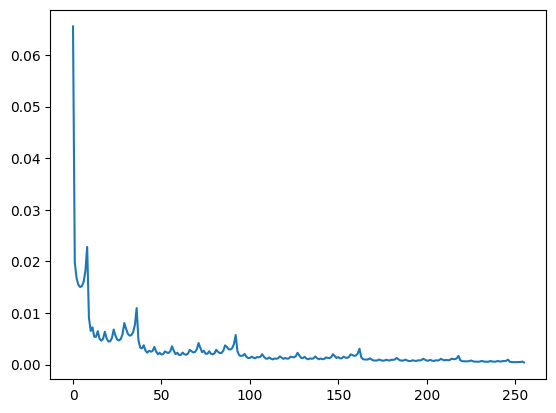

In [ ]:
plt.plot(PObs)

In [ ]:
ii = np.where( PObs == np.max(PObs) )
print(ObsStates[ii],PObs[ii])

[[0 0 0 0 0 0 0 0]] [0.06555083]


In [ ]:
np.sum(PObs)

0.7000000000000005

Secuencia oculta más probable: [[1 0 0 0 0 0 0 0]]
Probabilidad: [0.00029491]


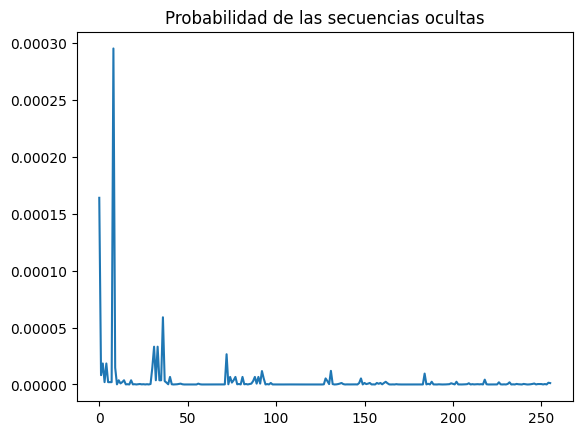

Observación más probable: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]
 ...
 [1 1 1 ... 1 0 1]
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 1]]
Probabilidad de la observación: [0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.0039

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations, combinations_with_replacement

States = np.array([0, 1])  # 0: Justa (J), 1: Sesgada (B)
prior = np.array([0.2, 0.8])  # Probabilidad a priori de los estados

T = np.array([[0.8, 0.2], [0.2, 0.8]])  # Matriz de transición
E = np.array([[0.5, 0.9], [0.5, 0.1]])  # Matriz de emisión

Obs = np.array([0, 1, 1, 1, 0, 1, 0, 1])  # Secuencia de observaciones (S -> 0, C -> 1)

DictH = {0: 'Justa', 1: 'Sesgada'}
DictO = {0: 'Sello', 1: 'Cara'}

# Función para generar las secuencias posibles de estados ocultos
def GetStates(State, N):
    CStates = list(combinations_with_replacement(State, N))
    Permu = []
    for it in CStates:
        p = list(permutations(it, N))
        for i in p:
            if i not in Permu:
                Permu.append(i)
    return np.array(Permu)

# Función para calcular la probabilidad de una secuencia de estados ocultos dada la secuencia de observaciones
def GetProb(T, E, Obs, State, Prior):
    n = len(Obs)
    p = 1.
    p *= Prior[State[0]]  # Probabilidad a priori del primer estado
    for i in range(n - 1):  # El último estado no va a ningun lado
        p *= T[State[i + 1], State[i]]  # Probabilidad de transición
    for i in range(n):  # Probabilidad de emisión
        p *= E[Obs[i], State[i]]
    return p

# Generar todas las secuencias posibles de estados ocultos para N=8
HiddenStates = GetStates(States, 8)

# Calcular la probabilidad de cada secuencia oculta
P = np.zeros(HiddenStates.shape[0])
for i in range(P.shape[0]):
    P[i] = GetProb(T, E, Obs, HiddenStates[i], prior)

# Imprimir la secuencia oculta más probable
ii = np.where(P == np.max(P))
print("Secuencia oculta más probable:", HiddenStates[ii])
print("Probabilidad:", P[ii])

# Visualización de las probabilidades de las secuencias ocultas
plt.plot(P)
plt.title("Probabilidad de las secuencias ocultas")
plt.show()

# Calcular las probabilidades de cada observación
ObsStates = GetStates([0, 1], 8)
Nobs = ObsStates.shape[0]

PObs = np.zeros(Nobs)
for j in range(Nobs):
    dim = HiddenStates.shape[0]
    P = np.zeros(dim)
    for i in range(dim):
        P[i] = GetProb(T, E, Obs, HiddenStates[i], prior)
    PObs[j] = np.sum(P)

# Normalización de las probabilidades de observación
PObs /= np.sum(PObs)  # Aseguramos que la suma de todas las probabilidades de observación sea 1



# Imprimir la observación más probable
ii = np.where(PObs == np.max(PObs))
print("Observación más probable:", ObsStates[ii])
print("Probabilidad de la observación:", PObs[ii])

# Sumar las probabilidades de todas las observaciones
print("Suma de las probabilidades de las observaciones:", np.sum(PObs))

Secuencia oculta más probable: [1 0 0 0 0 0 0 0]
Probabilidad de la secuencia oculta: 0.00029491200000000015


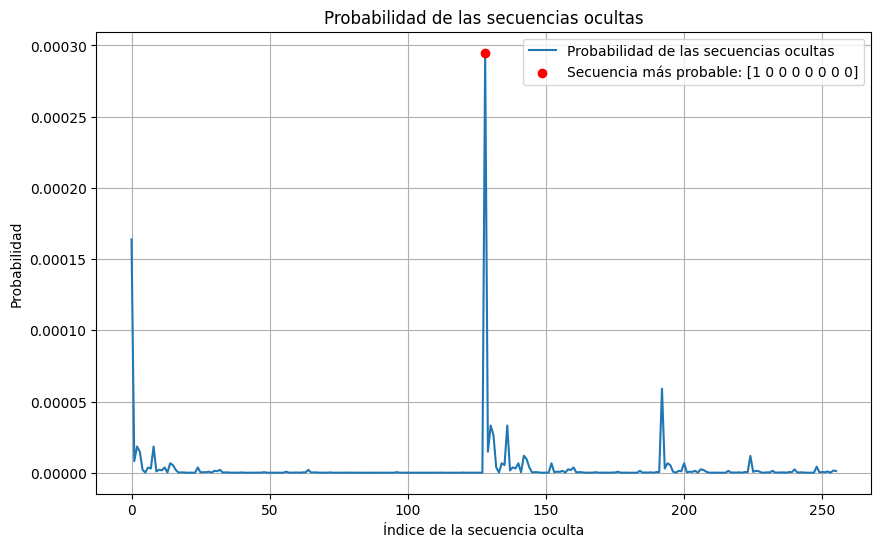

Probabilidades de cada estado observable: [0.86234277 0.13765723]
Suma de las probabilidades de las observaciones: 1.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

# Definición de los estados y probabilidades
States = np.array([0, 1])  # 0: Justa (J), 1: Sesgada (B)
prior = np.array([0.2, 0.8])  # Probabilidad a priori de los estados

T = np.array([[0.8, 0.2], [0.2, 0.8]])  # Matriz de transición
E = np.array([[0.5, 0.5], [0.9, 0.1]])  # Matriz de emisión

Obs = np.array([0, 1, 1, 1, 0, 1, 0, 1])  # Secuencia de observaciones (S -> 0, C -> 1)

# Función para calcular la probabilidad de una secuencia de estados ocultos dada la secuencia de observaciones
def GetProb(T, E, Obs, State, Prior):
    n = len(Obs)
    p = Prior[State[0]] * E[State[0], Obs[0]]  # Probabilidad a priori del primer estado
    for i in range(1, n):
        p *= T[State[i - 1], State[i]]  # Probabilidad de transición
        p *= E[State[i], Obs[i]]  # Probabilidad de emisión
    return p

# Generar todas las secuencias posibles de estados ocultos para N=8
N = 8
HiddenStates = np.array(list(product(States, repeat=N)))

# Calcular la probabilidad de cada secuencia oculta
P = np.zeros(HiddenStates.shape[0])
for i in range(P.shape[0]):
    P[i] = GetProb(T, E, Obs, HiddenStates[i], prior)

# Secuencia oculta más probable
max_index = np.argmax(P)
print("Secuencia oculta más probable:", HiddenStates[max_index])
print("Probabilidad de la secuencia oculta:", P[max_index])

# Visualización de las probabilidades de las secuencias ocultas
plt.figure(figsize=(10, 6))
plt.plot(P, label='Probabilidad de las secuencias ocultas')
plt.scatter(max_index, P[max_index], color='red', zorder=5, label=f'Secuencia más probable: {HiddenStates[max_index]}')
plt.title("Probabilidad de las secuencias ocultas")
plt.xlabel("Índice de la secuencia oculta")
plt.ylabel("Probabilidad")
plt.legend()
plt.grid(True)
plt.show()

# Calcular las probabilidades de cada observación utilizando el Forward Algorithm
PObs = np.zeros(2)  # Hay 2 observaciones: S (0) y C (1)
for state in States:
    PObs[state] = prior[state] * E[state, Obs[0]]

# Recursión hacia adelante
for t in range(1, N):
    new_PObs = np.zeros(2)
    for state in States:
        for prev_state in States:
            new_PObs[state] += PObs[prev_state] * T[prev_state, state] * E[state, Obs[t]]
    PObs = new_PObs

# Normalización de las probabilidades de observación
PObs /= np.sum(PObs)  # Aseguramos que la suma de todas las probabilidades de observación sea 1

# Imprimir las probabilidades de las observaciones
print("Probabilidades de cada estado observable:", PObs)

# Verificar que la suma de todos los estados observables es 1
print("Suma de las probabilidades de las observaciones:", np.sum(PObs))

# Si la suma no es 1 debido a errores de redondeo, la diferencia debería ser muy pequeña


**Ejercicios de muestreo**

**7.**  Usando  la  distribución  (empírica)  de  notas  de  matemáticas  vista  en  clase,  hacer  las siguientes estimaciones:
a)  Calcular la media de la nota con np.mean(data).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=np.loadtxt("/content/drive/MyDrive/Colab Notebooks/Data/Matematicas.txt")

In [ ]:
media=np.mean(data)
print("Media de la nota:", media)

Media de la nota: 75.25


b)  Calcular la mediana de la nota con np.percentile(data,50)

In [ ]:
mediana=np.percentile(data, 50)
print("Mediana de la nota:", mediana)

Mediana de la nota: 75.0


c)  Calcular  la  distribución  de  frecuencia  acumulada  y  la  distribución  acumulada  de probabilidad $P(X <=x)$.  En este caso, la mediana es el valor que toma la variablealeatoria que divide en 2 partes iguales la funci ́on de masa de probabilidad $(X=x)$

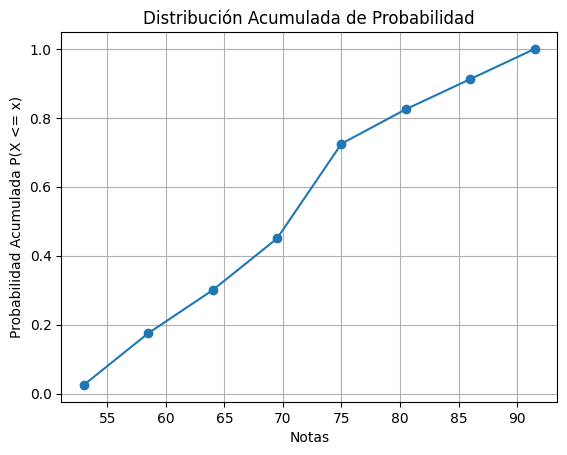

In [ ]:
import matplotlib.pyplot as plt
frequency, bins = np.histogram(data, bins='auto', density=False)
cumulative_frequency = np.cumsum(frequency)
cumulative_probability = cumulative_frequency / len(data)

plt.plot(bins[:-1], cumulative_probability, marker='o', linestyle='-')
plt.xlabel('Notas')
plt.ylabel('Probabilidad Acumulada P(X <= x)')
plt.title('Distribución Acumulada de Probabilidad')
plt.grid(True)
plt.show()

In [ ]:
# c) Calcular la distribución de frecuencia acumulada y la distribución acumulada de probabilidad
sorted_data = np.sort(data)
frecuencia_acumulada = np.arange(1, len(data) + 1) / len(data)

print("\nDistribución de frecuencia acumulada:")
for nota, freq in zip(sorted_data, frecuencia_acumulada):
    print(f"Nota: {nota}, Frecuencia acumulada: {freq}")

probabilidad_acumulada = frecuencia_acumulada

print("\nDistribución acumulada de probabilidad:")
for nota, prob in zip(sorted_data, probabilidad_acumulada):
    print(f"Nota: {nota}, Probabilidad acumulada: {prob}")

mediana_distribucion = sorted_data[np.searchsorted(probabilidad_acumulada, 0.5)]
print(f"\nMediana desde la distribución acumulada: {mediana_distribucion}")


Distribución de frecuencia acumulada:
Nota: 53.0, Frecuencia acumulada: 0.0125
Nota: 57.0, Frecuencia acumulada: 0.025
Nota: 59.0, Frecuencia acumulada: 0.0375
Nota: 60.0, Frecuencia acumulada: 0.05
Nota: 60.0, Frecuencia acumulada: 0.0625
Nota: 60.0, Frecuencia acumulada: 0.075
Nota: 61.0, Frecuencia acumulada: 0.0875
Nota: 61.0, Frecuencia acumulada: 0.1
Nota: 62.0, Frecuencia acumulada: 0.1125
Nota: 62.0, Frecuencia acumulada: 0.125
Nota: 62.0, Frecuencia acumulada: 0.1375
Nota: 62.0, Frecuencia acumulada: 0.15
Nota: 63.0, Frecuencia acumulada: 0.1625
Nota: 63.0, Frecuencia acumulada: 0.175
Nota: 65.0, Frecuencia acumulada: 0.1875
Nota: 65.0, Frecuencia acumulada: 0.2
Nota: 65.0, Frecuencia acumulada: 0.2125
Nota: 66.0, Frecuencia acumulada: 0.225
Nota: 67.0, Frecuencia acumulada: 0.2375
Nota: 67.0, Frecuencia acumulada: 0.25
Nota: 68.0, Frecuencia acumulada: 0.2625
Nota: 68.0, Frecuencia acumulada: 0.275
Nota: 68.0, Frecuencia acumulada: 0.2875
Nota: 69.0, Frecuencia acumulada: 0.

d)  Usando la técnica de re-muestreo (Bootstrapping), obtenga la funci ́on de distribución de la media conrandom.choices, donde el tamaño de muestra sea igual al poblacional. En este caso, se analiza la variabilidad de la población respecto a la media.

Media de las medias del bootstrap: 75.26939
Desviación estándar de las medias del bootstrap: 1.1621217918746727
Media ajustada (Gaussiana): 75.26939
Desviación estándar ajustada (Gaussiana): 1.1621217918746727


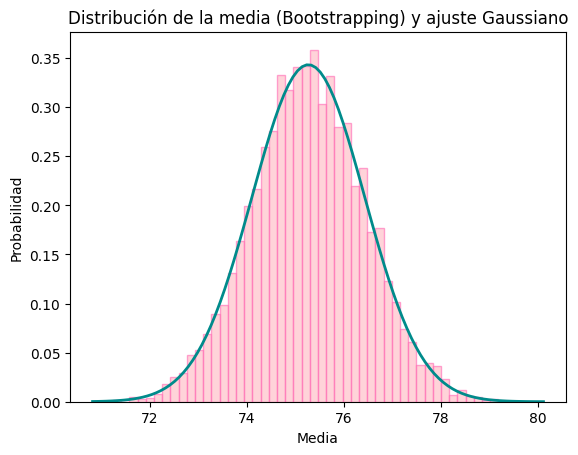

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

n_iterations = 10000
sample_size = len(data)
bootstrap_means1 = []


for _ in range(n_iterations):
    sample = random.choices(data, k=sample_size)
    bootstrap_means1.append(np.mean(sample))


bootstrap_means = np.array(bootstrap_means1)
bootstrap_mean = np.mean(bootstrap_means1)
bootstrap_std = np.std(bootstrap_means1)


mu, std = norm.fit(bootstrap_means1)
print(f"Media de las medias del bootstrap: {bootstrap_mean}")
print(f"Desviación estándar de las medias del bootstrap: {bootstrap_std}")
print(f"Media ajustada (Gaussiana): {mu}")
print(f"Desviación estándar ajustada (Gaussiana): {std}")

plt.hist(bootstrap_means1, bins=50, edgecolor='hotpink', density=True, alpha=0.6, color='lightpink')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'darkcyan', linewidth=2)
plt.title("Distribución de la media (Bootstrapping) y ajuste Gaussiano")
plt.xlabel("Media")
plt.ylabel("Probabilidad")
plt.show()


In [ ]:
mediana_bootstrap=np.percentile(bootstrap_means, 50)
print("Mediana del bootstrap:", mediana_bootstrap)


Mediana del bootstrap: 75.2375


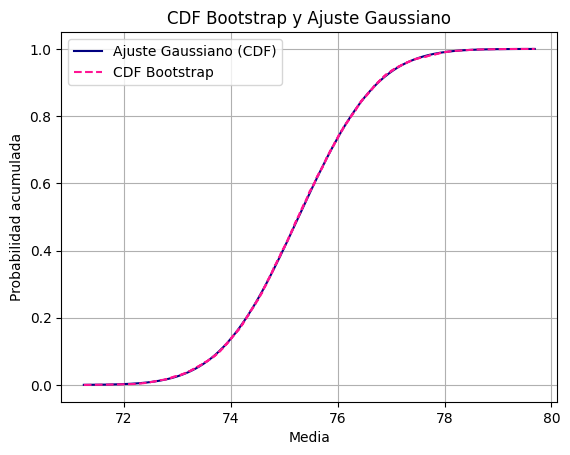

In [ ]:
sorted_means = np.sort(bootstrap_means1)
cdf = np.linspace(0, 1, len(sorted_means))
x = np.linspace(min(sorted_means), max(sorted_means), 1000)

mu, std = norm.fit(bootstrap_means)
cdf_fitted = norm.cdf(x, mu, std)

plt.plot(x, cdf_fitted,color="navy", linestyle='-', label="Ajuste Gaussiano (CDF)")
plt.plot(sorted_means, cdf, color="deeppink", linestyle='--', label="CDF Bootstrap")
plt.title("CDF Bootstrap y Ajuste Gaussiano")
plt.xlabel("Media")
plt.ylabel("Probabilidad acumulada")
plt.legend()
plt.grid()
plt.show()


**9)**. Una persona viaja de  $A$  a  $B$  con una velocidad media de 30 millas por hora y regresa de  B  a  A  a una velocidad media de 60 millas por hora. Hallar la velocidad media en el viaje completo.  Ans:$40 mi/h$

In [ ]:
v1 = 30
v2 = 60


v_media = (2 * v1 * v2) / (v1 + v2)
print(f"La velocidad media en el viaje completo es {v_media} mi/h")


La velocidad media en el viaje completo es 40.0 mi/h


11). Considere  la  variable  aleatoria  definida  por  una  combinaci ́on  lineal  de  otras  variablesaleatorias:$X=a_1X_1+a_2X_2+...a_nX_n$,  donde  las  variables  aleatorias  (Xi)  no  son necesariamente  idénticamente  distribuidas,  y  las  componentes  $[a1,a2,...,an]∈R$.   La variable aleatoria X puede ser escrita como:$X=a^T\overrightarrow{X}$con la definición usual de producto interno entre vectores.  

El primer y segundo momento de la variable X queda entonces expresados por:

$E(X) =E(a^T\overrightarrow{X}) =a^TE(\overrightarrow{X})$

$Var(X) =Var(a^T\overrightarrow{X})=a^TCov(\overrightarrow{X})a$    

Donde Cov$(\overrightarrow{X})$ es la matriz  de  covarianza  de$\overrightarrow{X}$.   Sea $X1∼Γ(2,3),X2∼N(5,2)  yX3∼U(0,10)$,

Genere $N= 10^4$ eventos (que estabilice el valor de los momentos) para obtener la distribución de $X=X_1+ 2X_2−X_3$.  Calcule el primer y segundo momento de X a través de dos estrategias:


a)  Usando directamente el array de X.

b)  Usando las definiciones generales dadas en la Ecuación (7.32).


c)  Calcule el coeficiente de correlación de Pearson para las tres variables.

d)  Demuestre que la formula de la varianza de la media se puede escribir escalarmente

In [ ]:
import numpy as np
import scipy.stats as stats
N = 10**4

X1 = np.random.gamma(shape=2, scale=3, size=N)
X2 = np.random.normal(loc=5, scale=2, size=N)
X3 = np.random.uniform(low=0, high=10, size=N)

In [ ]:
X = X1 + 2 * X2 - X3

In [ ]:
E_X_direct = np.mean(X)
Var_X_direct = np.var(X)

print("Primer momento (E(X)) usando array de X:", E_X_direct)
print("Segundo momento (Var(X)) usando array de X:", Var_X_direct)

Primer momento (E(X)) usando array de X: 10.916272853566607
Segundo momento (Var(X)) usando array de X: 42.92173997739549


In [ ]:
#B
a = np.array([1, 2, -1])

E_X1 = np.mean(X1)
E_X2 = np.mean(X2)
E_X3 = np.mean(X3)

E_vec_X = np.array([E_X1, E_X2, E_X3])
Cov_X = np.cov(np.vstack([X1, X2, X3]), bias=True)
E_X_formula = np.dot(a, E_vec_X)

Var_X_formula = np.dot(a.T, np.dot(Cov_X, a))
print("Primer momento (E(X)) usando formula:", E_X_formula)
print("Segundo momento (Var(X)) usando formula:", Var_X_formula)

Primer momento (E(X)) usando formula: 10.916272853566603
Segundo momento (Var(X)) usando formula: 42.9217399773955


Pierson:

In [ ]:
#C
corr_X1_X2 = np.corrcoef(X1, X2)[0, 1]
corr_X1_X3 = np.corrcoef(X1, X3)[0, 1]
corr_X2_X3 = np.corrcoef(X2, X3)[0, 1]
print("Correlación de Pearson:")
print("  X1 y X2:", corr_X1_X2)
print("  X1 y X3:", corr_X1_X3)
print("  X2 y X3:", corr_X2_X3)

Correlación de Pearson:
  X1 y X2: 0.015322571452398525
  X1 y X3: 0.008061423273771337
  X2 y X3: -0.007412405391813689


In [ ]:
N_small = 2
X_small = np.random.normal(0, 1, size=(N_small, 2))
Var_mean_small = np.var(np.mean(X_small, axis=0))
Cov_terms_small = np.cov(X_small.T)[0, 1]


Var_mean_formula_small = (1 / N_small**2) * (np.var(X_small[:, 0]) + np.var(X_small[:, 1]) + 2 * Cov_terms_small)

Var_mean_general = (1 / N**2) * (
    np.sum(np.var([X1, X2, X3], axis=1)) +
    2 * np.sum([Cov_X[i, j] for i in range(3) for j in range(i+1, 3)])
)

print("Varianza de la media (N=2):", Var_mean_small)
print("Varianza de la media fórmula (N=2):", Var_mean_formula_small)

print("Varianza de la media general (N=10^4):", Var_mean_general)

Varianza de la media (N=2): 0.7150167773284858
Varianza de la media fórmula (N=2): 0.10361049901133607
Varianza de la media general (N=10^4): 3.095276070918033e-07




---



**Ejercicios de Montecarlo**



---



6). Usando la generación de puntos sobre una esfera estime los momentos de inercia de la esfera respecto a los ejes de rotación $I_{xx},I_{yy},I_{zz}$. Los momentos están dados por:

$I_{xx}=\int_V(y^2+z^2)dxdydz$

$I_{yy}=\int_V(x^2+z^2)dxdydz$

$I_{zz}=\int_V(x^2+y^2)dxdydz$

En este problema estamos asumiendo que la densidad de la esfera es $ρ= 1kg/m^3$ con volumen  unitario.   Usando  el  método  de  MonteCarlo  las  integrales  se  pueden  estimarcomo (por ejemplo para $I_xx$):


$I_{xx}≈\frac{1}{N}\sum_{i=1}^{N}=(y[i]^2+z[i]^2)$

Compare con el resultado exacto $I_ij$= 2/5 para i=x, y, z con i=j.  Adicionalmente, estime el producto de inercia $I_{xy}$:

$I_{xy}=−\int_V{xydxdydz}$.

¿Qué puede concluir sobre la simetría de rotación de la esfera?

Momentos de inercia estimados:
Ixx: 0.4014166310551573
Iyy: 0.402383630301767
Izz: 0.40104342302239265
Ixy: -0.0006268640697273338

Valor teórico (para una esfera sólida uniforme): 0.4


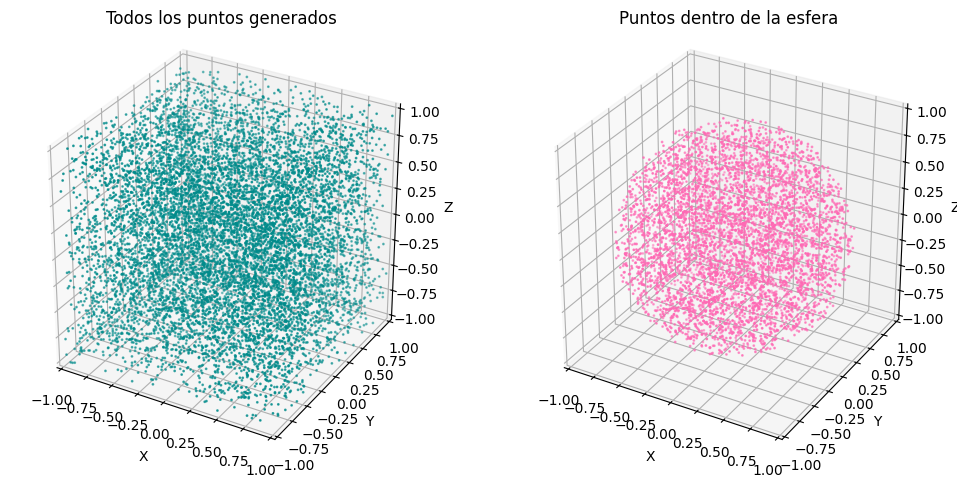

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting

def generar_puntos_esfera(N, radio=1.0):
    # Generate all points initially
    all_points = np.random.uniform(-radio, radio, (N, 3))

    # Filter points to be within the sphere
    puntos = all_points[np.sum(all_points**2, axis=1) <= radio**2]

    return puntos, all_points  # Return both sets of points

def estimar_momentos_inercia(puntos):
    x = puntos[:, 0]
    y = puntos[:, 1]
    z = puntos[:, 2]
    N = len(puntos)

    Ixx = np.sum(y**2 + z**2) / N
    Iyy = np.sum(x**2 + z**2) / N
    Izz = np.sum(x**2 + y**2) / N
    Ixy = -np.sum(x * y) / N

    return Ixx, Iyy, Izz, Ixy


N = 10000
radio = 1.0

puntos, all_points = generar_puntos_esfera(N, radio)  # Get both sets

Ixx, Iyy, Izz, Ixy = estimar_momentos_inercia(puntos)

print("Momentos de inercia estimados:")
print("Ixx:", Ixx)
print("Iyy:", Iyy)
print("Izz:", Izz)
print("Ixy:", Ixy)
print("\nValor teórico (para una esfera sólida uniforme):", 2/5)


# Create two subplots
fig = plt.figure(figsize=(12, 6))

# Subplot 1: All points
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_box_aspect([1,1,1])
ax1.scatter(all_points[:, 0], all_points[:, 1], all_points[:, 2], s=1, color="darkcyan")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Todos los puntos generados')
ax1.set_xlim([-radio, radio])
ax1.set_ylim([-radio, radio])
ax1.set_zlim([-radio, radio])

# Subplot 2: Points within the sphere
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_box_aspect([1,1,1])
ax2.scatter(puntos[:, 0], puntos[:, 1], puntos[:, 2], s=1, color="hotpink")
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('Puntos dentro de la esfera')
ax2.set_xlim([-radio, radio])
ax2.set_ylim([-radio, radio])
ax2.set_zlim([-radio, radio])

plt.show()

Como obtuvimos mediante el código, la simetríade rtación de la esfera es evidente en los datos. Los momentos de inercia respecto a los ejes $I_{xx}, I_{yy} e I_{zz}$ son prácticamente los mismos valores, lo que nos indica que la distribucion de la masa es uniforme en todas las direcciones. Además, al obtener el producto entre las inercias $I_{xy}$ obtuvimos un valor cercano a 0, lo que nos muestra que no hay un acoplamiento entre los ejes perpendiculares, es decir, que la esferam es simétrica en sus 3 dimensiones.

**9)** La distribución Beta está dada por:


$f(x;α,β) =\frac{Γ(α+β)}{Γ(α)Γ(β)}x^{α−1}(1−x)^{β−1}$, $0≤x≤1$ donde $Γ(n) = (n−1)!$.  Para f(x; 2,4), halle el área bajo la curva usando el método de aceptación y rechazo con una incertidumbre del 1.

In [ ]:
import numpy as np
from scipy.special import gamma

def distribucion_de_beta(x, alpha, beta):
    coef = gamma(alpha + beta) / (gamma(alpha) * gamma(beta))
    return coef * x**(alpha - 1) * (1 - x)**(beta - 1)


In [ ]:
def aceptacion_rechazo(alpha, beta, uncertaily=0.01):
    valores_de_X=np.linspace(0,1,1000)
    valores_f=distribucion_de_beta(valores_de_X, alpha, beta)
    Max=max(valores_f)

    area_rectangulo=1*Max
    N=1000
    aceptados=0

    while True:
        x=np.random.uniform(0,1, N)
        y=np.random.uniform(0,Max,N)

        bajo_la_curva=y<=distribucion_de_beta(x, alpha, beta)
        aceptados=np.sum(bajo_la_curva)
        area_estimada=(aceptados/N)*area_rectangulo
        #uncertainty_calculated = np.sqrt(area_estimada * (1 - area_estimada) / N)
        incertidumbre=area_estimada*np.sqrt((uncertaily/N))
        if incertidumbre<uncertaily:
            break
        else:
            N*=2
    return area_estimada, incertidumbre, N
alpha=2
beta=4
uncertaily=0.01
area_estimada, error, N=aceptacion_rechazo(alpha, beta, uncertaily)
print(f"Área estimada: {area_estimada}")
print(f"Incertidumbre: {error}")
print(f"Número de iteraciones: {N}")

Área estimada: 1.0167180711319566
Incertidumbre: 0.0032151448430300716
Número de iteraciones: 1000
